# Social Defeat Dopamine Analysis

DA data

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from Hab_Dishab.hd_extension import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac_csvs"
# brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc_csvs"
brain_region = '#FFAF00'

In [3]:
bout_definitions = [
    {'prefix': 'bully', 'introduced': 'Subject_Introduced', 'removed': 'Subject_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p1-240510-082326\Notes.txt
read from t=0s to t=952.19s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p2-240510-094249\Notes.txt
read from t=0s to t=922.7s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p3-240513-064912\Notes.txt
read from t=0s to t=914.45s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p4-240513-082248\Notes.txt
read from t=0s to t=929.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p5-240916-090016\Notes.txt
read from t=0s to t=861.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p6-240916-095652\Notes.txt
read from t=0s to t=879.75s
Found Synapse note file: C:\Users\alber\OneDriv

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=9, 
                                  mode='standard')


Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p4-240513-082248...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705...
Processing behaviors for pp6-250223-135048...
Processing behaviors for pp7-250223-141336...
Processing behaviors for pp8-250223-143545...
Computing DA metrics for p1-240510-082326 ...
Computing DA metrics for p2-240510-094249 ...
Computing DA metrics for p3-240513-064912 ...
Computing DA metrics for p4-240513-082248 ...
Computing DA metrics for p5-240916-090016 ...
Computing DA metrics for p6-240916-095652 

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
exp_da_dict

{'p1':        Bout       Behavior  Event_Start  Event_End  Duration (s)        AUC  \
 0   bully-1       Approach      662.200    665.266         3.066   0.057067   
 1   bully-1         Defeat      219.933    249.867        29.934  -2.723244   
 2   bully-1         Defeat      280.200    306.067        25.867  11.608560   
 3   bully-1         Defeat      310.467    318.533         8.066  16.345053   
 4   bully-1         Defeat      358.867    367.600         8.733  13.761923   
 5   bully-1         Defeat      445.933    454.867         8.934   4.012317   
 6   bully-1         Defeat      518.600    525.933         7.333   3.336480   
 7   bully-1         Defeat      557.067    563.467         6.400   6.842793   
 8   bully-1         Defeat      571.333    588.133        16.800  -0.809937   
 9   bully-1         Defeat      593.933    604.133        10.200   2.944209   
 10  bully-1         Defeat      614.733    621.333         6.600   6.645252   
 11  bully-1         Defeat      6

In [8]:
desired_bouts = ['bully-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Defeat", desired_bouts=desired_bouts)

In [9]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,p1,bully-1,Defeat,4.931410,2.274227,0.986827
1,p2,bully-1,Defeat,8.083765,2.810666,1.632537
2,p3,bully-1,Defeat,4.460242,1.813319,0.596628
3,p4,bully-1,Defeat,3.587748,1.936012,0.848872
4,p5,bully-1,Defeat,-0.498530,0.857911,-0.042990
5,p6,bully-1,Defeat,2.496510,1.118204,0.515442


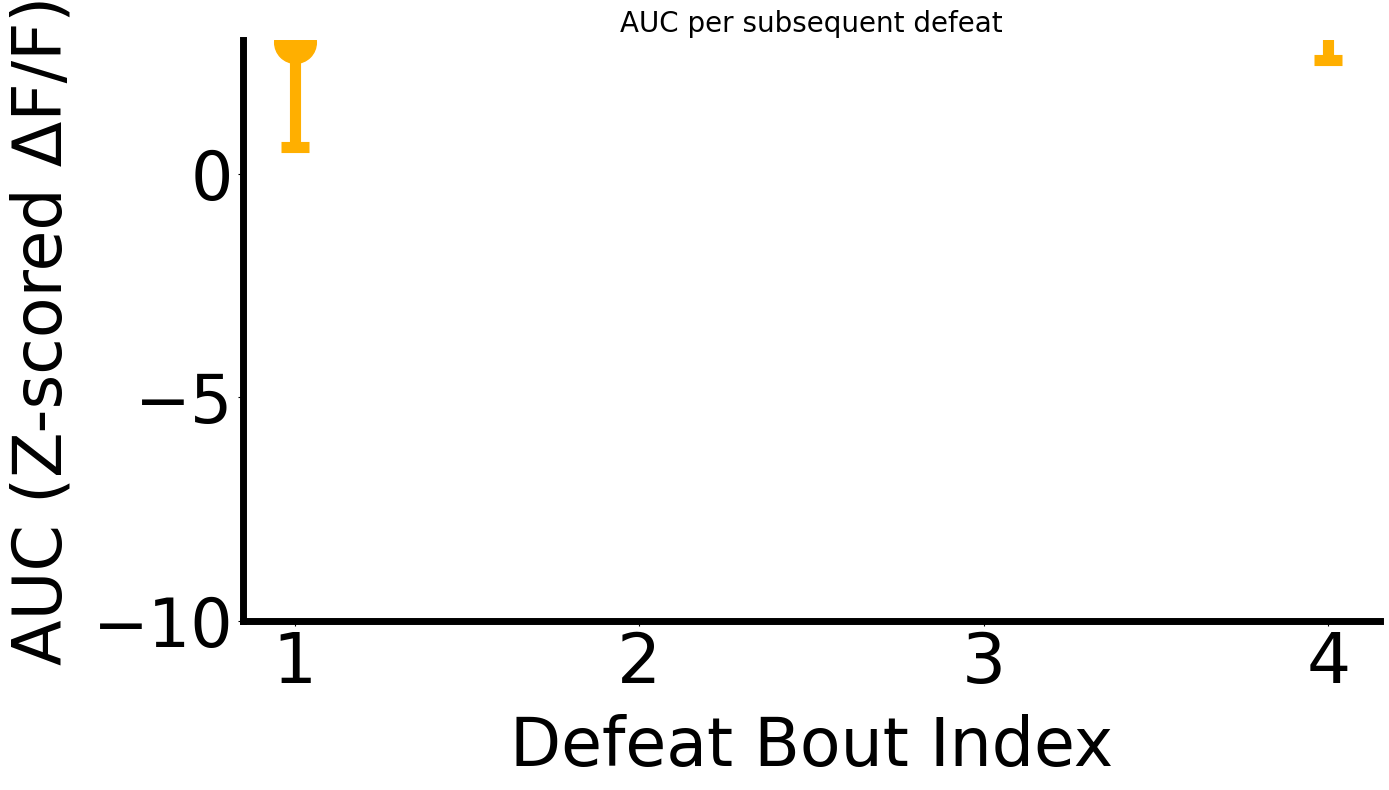


=== Computed Metric (SLOPE): ===
Bout: bully-1, slope = 0.719


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,bully-1,1,15,2.952614,9.069624,2.341767
1,bully-1,2,15,5.156778,4.680440,1.208484
2,bully-1,3,15,6.037185,9.335742,2.410478
3,bully-1,4,15,5.054464,9.623688,2.484826


In [10]:
plot_peak_for_subsequent_behaviors(exp_da_dict, selected_bouts=["bully-1"], behavior="Defeat", 
                                   n_subsequent_behaviors=4,
                                   peak_col='AUC',
                                   xlabel="Defeat Bout Index",
                                    ylabel="AUC (Z-scored ΔF/F)",
                                    plot_title="AUC per subsequent defeat",
                                    ylim = (-10, 3),
                                    brain_region=brain_region,
                                    save_path=None)
                                    # figsize=(14,8),
                                    # save_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat\mPFC_defeat.png")


In [11]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)


Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p4-240513-082248...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705...
Processing behaviors for pp6-250223-135048...
Processing behaviors for pp7-250223-141336...
Processing behaviors for pp8-250223-143545...


In [12]:
experiment.compute_all_event_induced_DA(pre_time=4, post_time=10)

Computing event-induced DA for trial p1-240510-082326 ...
Computing event-induced DA for trial p2-240510-094249 ...
Computing event-induced DA for trial p3-240513-064912 ...
Computing event-induced DA for trial p4-240513-082248 ...
Computing event-induced DA for trial p5-240916-090016 ...
Computing event-induced DA for trial p6-240916-095652 ...
Computing event-induced DA for trial p7-240916-110418 ...
Computing event-induced DA for trial p8-240916-115836 ...
Computing event-induced DA for trial pp1-250223-093419 ...
Computing event-induced DA for trial pp2-250223-082553 ...
Computing event-induced DA for trial pp3-250223-084945 ...
Computing event-induced DA for trial pp4-250223-091227 ...
Computing event-induced DA for trial pp5-250223-132705 ...
Computing event-induced DA for trial pp6-250223-135048 ...
Computing event-induced DA for trial pp7-250223-141336 ...
Computing event-induced DA for trial pp8-250223-143545 ...


In [13]:
# experiment.trials['n7-240916-113157'].behaviors.head()

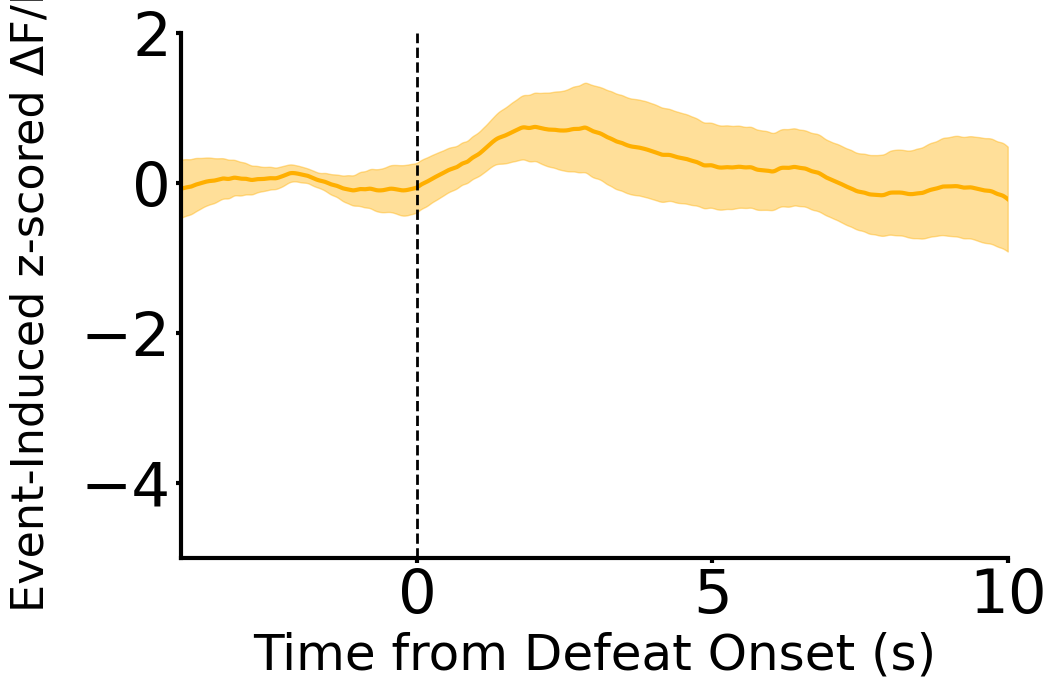

In [14]:
aggregated_defeat = experiment.plot_average_defeat_bout_psth(
    nth_defeat=1,
    directory_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat",
    # directory_path=r"Social_Defeat\sd_da_analysis.ipynb",
    bin_size=100,
    y_min=-5,
    y_max=2,
    brain_region=brain_region
)

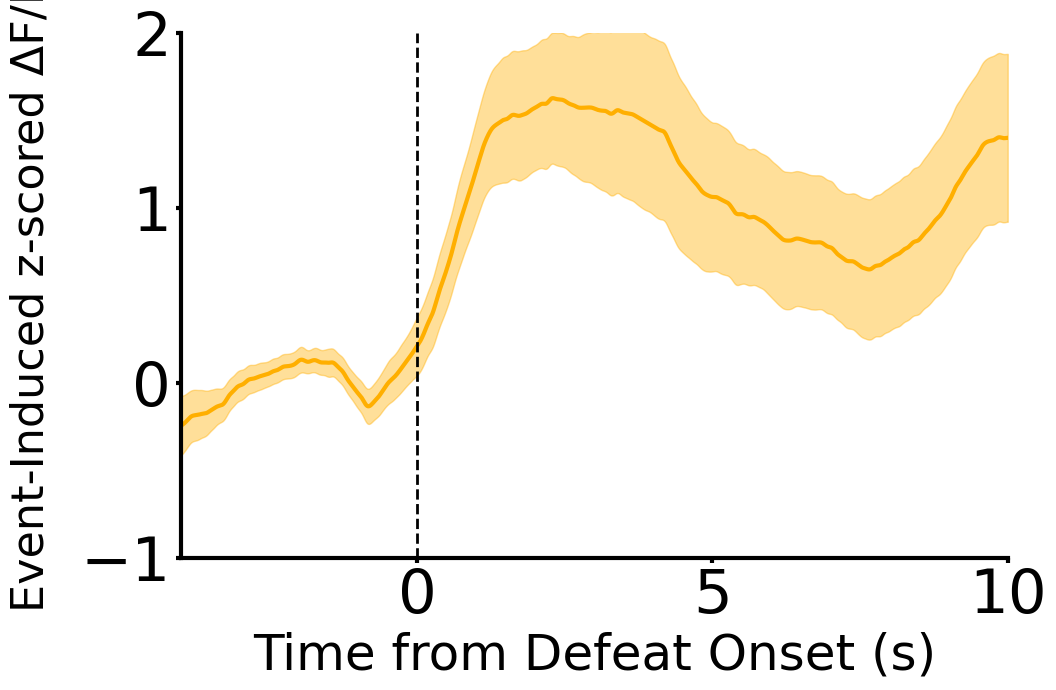

In [15]:
aggregated_defeat = experiment.plot_average_defeat_bout_psth(
    nth_defeat=2,
    directory_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat",
    bin_size=100,
    y_min=-1,
    y_max=2,
    brain_region=brain_region
)